In [1]:
import re
import math
from pymystem3 import Mystem
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

In [7]:
m = Mystem()
lit = 'alisa_ch02.txt'
tech = 'mediatext.txt'
def read_text(fname):
    _text = ''
    with open(fname) as fin:
        _text = fin.read()
    return _text

### Лексико-статистический анализ главы 2 книги Л. Кэрролла, "Приключения Алисы в стране чудес"

In [19]:
littext = read_text(lit)
litlemmas = m.lemmatize()

In [10]:
print(f"""
Кол-во лемм:              {len(litlemmas)}
Кол-во уникальных лемм:   {len(set(litlemmas))}
Разнообразие лемм:        {len(set(litlemmas)) / len(litlemmas)}
""")


Кол-во лемм:              3400
Кол-во уникальных лемм:   701
Разнообразие лемм:        0.2061764705882353



In [11]:
def lemma_freq(lemma, lemmas):
    return len([l for l in lemmas if l == lemma]) / len(lemmas)

def lemmas_freqs(lemmas):
    return [(l, lemma_freq(l, lemmas)) for l in set(lemmas)]

def most_freq_lemmas(lemmas, n=0):
    _freqs = lemmas_freqs(lemmas)
    if n > len(_freqs) or n <= 0:
        n = len(_freqs)
    return sorted(_freqs, key=lambda x: x[1], reverse=True)[:n]

In [12]:
most_freq_lemmas(litlemmas, 10)

[(' ', 0.22941176470588234),
 ('  ', 0.07617647058823529),
 ('\n', 0.05235294117647059),
 (', ', 0.03323529411764706),
 ('она', 0.019705882352941177),
 ('и', 0.018235294117647058),
 ('я', 0.014411764705882353),
 ('в', 0.012647058823529412),
 ('    ', 0.012647058823529412),
 (',  ', 0.012352941176470587)]

При выводе наиболее часто встречающихся лемм, можно заметить, что большую часть текста составляют малозначащие пробелы и переносы строк "\n". Так как анализатор MyStem не разбивает текст на предложения и нам в первую очередь необходимо исследовать морфологические данные, уберем все леммы, не содержащие букв и цифр.

In [13]:
litlemmas = [l for l in litlemmas if re.match(r'\w+|\d+', l)]

In [14]:
print(f"""
Кол-во лемм: {len(litlemmas)}
Кол-во уникальных лемм: {len(set(litlemmas))}
Разнообразие лемм: {len(set(litlemmas)) / len(litlemmas)}
""")


Кол-во лемм: 1595
Кол-во уникальных лемм: 629
Разнообразие лемм: 0.3943573667711599



In [15]:
lit_freq = most_freq_lemmas(litlemmas, 100)
lit_freq[:10]

[('она', 0.04200626959247649),
 ('и', 0.038871473354231974),
 ('я', 0.030721003134796237),
 ('в', 0.026959247648902823),
 ('не', 0.020689655172413793),
 ('быть', 0.019435736677115987),
 ('алиса', 0.019435736677115987),
 ('что', 0.015047021943573668),
 ('а', 0.012539184952978056),
 ('мышь', 0.011912225705329153)]

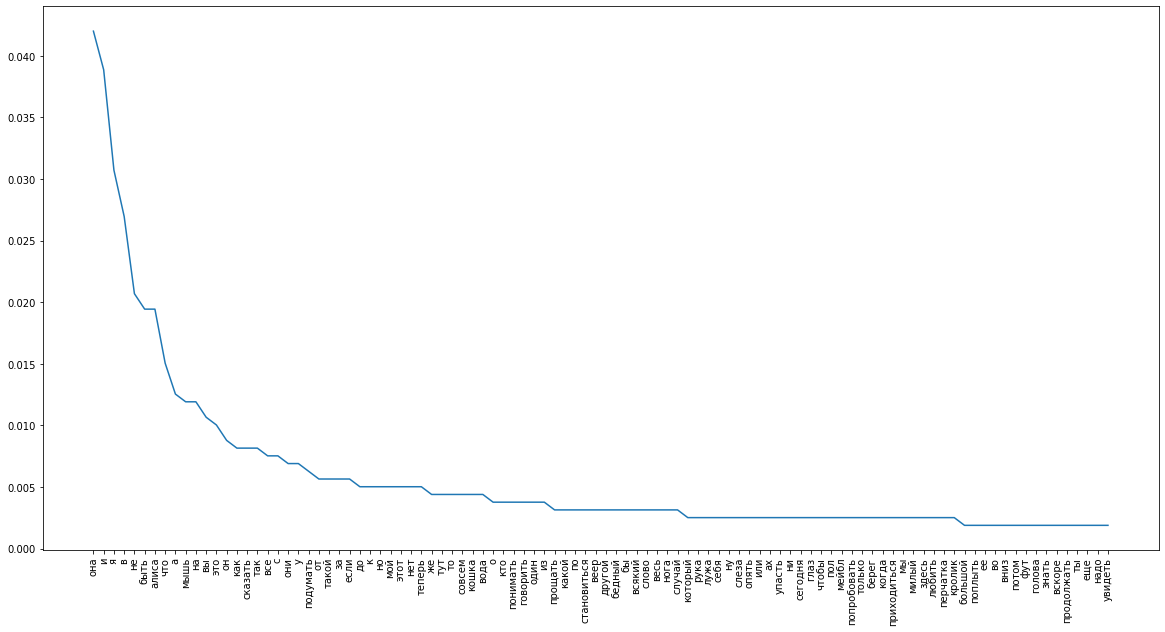

In [16]:
plt.plot([l[0] for l in lit_freq], [l[1] for l in lit_freq])
plt.xticks([l[0] for l in lit_freq], [l[0] for l in lit_freq], rotation='vertical')
plt.show()

Рассмотрим статистические данные, которые можно извлечь из морфологического анализа текста.

In [20]:
littokens = m.analyze(littext)

Структура токенов MyStem представляет собой словарь (ассоциативный массив):<br>
{<br>
&emsp;'text': <словоформа>, <br>
&emsp;'analysis': [<br>
&emsp;&emsp;{<br>
&emsp;&emsp;&emsp;'lex': <лемма>, <br>
&emsp;&emsp;&emsp;'wt': <вес для разрешения омонимии>, <br>
&emsp;&emsp;&emsp;'gr': <морфологические данные><br>
&emsp;&emsp;}<br>
&emsp;]<br>
}<br>
<br>
В случае, если для словоформы было найдено несколько вариантов и программа не смогла решить, какой выбрать, в поле 'analysis' выводятся все варианты (омонимы).<br>
Нас интересуют только те токены, у которых есть морфологические данные.

In [21]:
littokens = [l for l in littokens if 'analysis' in l and l['analysis']]

In [22]:
def tokens_text_cnt(text, tokens):
    return len([t for t in tokens if t['text'] == text])

def tokens_lex_cnt(lex, tokens):
    return len([t for t in tokens if t['analysis'][0]['lex'] == lex])

avg_txt_to_lex = sum(
    [tokens_text_cnt(l['text'], littokens) / tokens_lex_cnt(l['analysis'][0]['lex'], littokens) 
     for l in littokens if l['analysis']]) / len(littokens)

In [23]:
print(f"""
Общее число словоупотреблений: {len(littokens)}
Число различных словоформ:     {len(set(l['text'] for l in littokens))}
Разнообразие слов:             {len(set(l['text'] for l in littokens)) / len(littokens):.4f}
Средняя частота словоформ:     {avg_txt_to_lex:.4f}
""")


Общее число словоупотреблений: 1588
Число различных словоформ:     848
Разнообразие слов:             0.5340
Средняя частота словоформ:     0.7263



In [44]:
m2 = Mystem(disambiguation=False, weight=True, end_of_sentence=True)

In [65]:
nlittext = littext.replace('\n', '')
littokens2 = m2.analyze(nlittext)

In [66]:
len(set([l['text'] for l in littokens2 if 'analysis' in l and len(l['analysis']) > 1]))

329

In [67]:
len(set(l['text'] for l in littokens2 if 'analysis' in l))

866

In [68]:
[l for l in littokens2 if 'analysis' in l and len(l['analysis']) > 1]

[{'analysis': [{'lex': 'весь',
    'wt': 0.5638720238,
    'gr': 'APRO=(им,мн|вин,ед,сред|им,ед,сред|вин,мн,неод)'},
   {'lex': 'все', 'wt': 0.2107410599, 'gr': 'ADV='},
   {'lex': 'все', 'wt': 0.1955883233, 'gr': 'SPRO,мн=(вин|им)'},
   {'lex': 'все', 'wt': 0.02298848183, 'gr': 'PART='},
   {'lex': 'все', 'wt': 0.006810111131, 'gr': 'SPRO,ед,сред,неод=(вин|им)'}],
  'text': 'Все'},
 {'analysis': [{'lex': 'страно',
    'wt': 0.9957097318,
    'qual': 'bastard',
    'gr': 'ADV=срав'},
   {'lex': 'странний',
    'wt': 0.004290268202,
    'qual': 'bastard',
    'gr': 'A=срав'}],
  'text': 'страньше'},
 {'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='},
   {'lex': 'и', 'wt': 1.020511514e-05, 'gr': 'INTJ='},
   {'lex': 'и',
    'wt': 6.379604644e-06,
    'gr': 'S,сокр=(пр,мн|пр,ед|вин,мн|вин,ед|дат,мн|дат,ед|род,мн|род,ед|твор,мн|твор,ед|им,мн|им,ед)'},
   {'lex': 'и', 'wt': 6.37957056e-06, 'gr': 'PART='}],
  'text': 'и'},
 {'analysis': [{'lex': 'страно',
    'wt': 0.9957097318,

In [69]:
len(littokens2)

3248

In [80]:
print('setences:', len([i for i, l in enumerate(littokens2) if l['text'] == '\s']) + 1)
print('all:', len(littokens2))

setences: 173
all: 3248
